***Feature selection using decision trees involves identifying the most important features in a dataset based on their contribution to the decision tree’s performance***

### Why is it important?

Feature selection helps in:

    Increasing model performance.
    Increasing model interpretability.
    Reducing model complexity.
    Enhancing data visualization.


In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('data/apple_quality.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
df.isnull().sum()


A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

There are only few NaN values, so we can remove them

In [7]:
df = df.dropna()
df.isnull().sum()


A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
# Let's split the data and define our features and target

X = df.drop(['Quality','A_id'], axis = 1)
y = df['Quality']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.3)


In [9]:
# Let's scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:


# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=16, random_state=8)
clf.fit(X_train_scaled, y_train)
y_pred_all_features = clf.predict(X_test_scaled)

# Calculate the accuracy of the model with all features
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print('Accuracy with all features: %0.2f'%(accuracy_all_features*100))

Accuracy with all features: 82.42


In [11]:
# Get feature importances
feature_importances = clf.feature_importances_

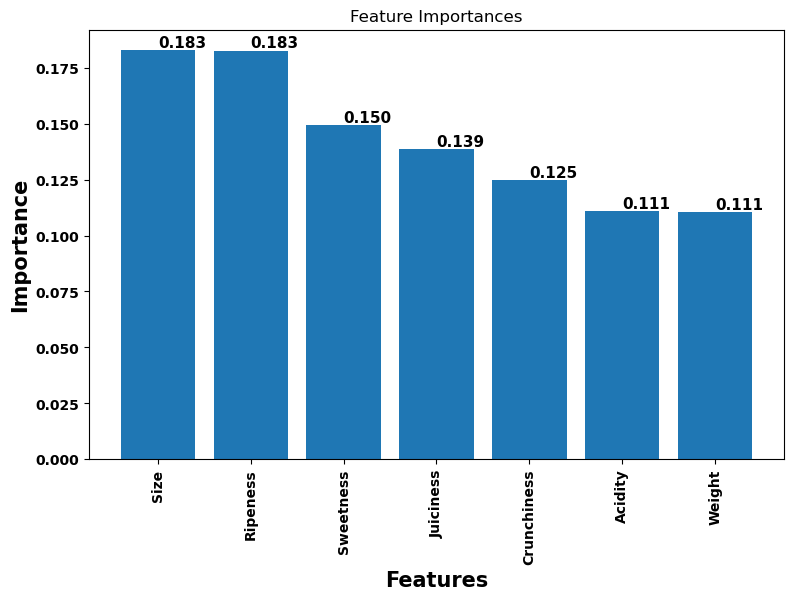

In [12]:
# Sort the feature importances in descending order and get the corresponding indices
indices = np.argsort(feature_importances)[::-1]

feature_names = X_train.columns

# Rearrange the feature names based on sorted indices
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_importances = feature_importances[indices]

# Plot the feature importances
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')
ax1.set_title("Feature Importances")
bars=ax1.bar(range(X_train_scaled.shape[1]), sorted_feature_importances, align='center')
ax1.set_xticks(range(X_train_scaled.shape[1]), sorted_feature_names, rotation=90)
ax1.set_xlabel('Features',fontsize=15,fontweight='bold')
ax1.set_ylabel('Importance',fontsize=15,fontweight='bold')
plt.tight_layout()

# Annotate the bars with the feature importance values
for bar, importance in zip(bars, sorted_feature_importances):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{importance:.3f}', va='bottom',fontsize=11,fontweight='bold') 

for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

In [13]:
# Select features with importance greater than a threshold
threshold = 0.12  # Adjust as needed
selected_features = X.columns[feature_importances > threshold]
 
# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [14]:

# Train a new model using the selected features
clf_selected = DecisionTreeClassifier(max_depth=16, random_state=8)
clf_selected.fit(X_train_selected, y_train)


DecisionTreeClassifier(max_depth=16, random_state=8)

In [15]:
# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = clf_selected.predict(X_test_selected)
 
# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print('Accuracy with selected features: %0.2f'%(accuracy_selected_features*100))


Accuracy with selected features: 79.33


# Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold

estimator =  DecisionTreeClassifier()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, shuffle=True), scoring="accuracy")
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

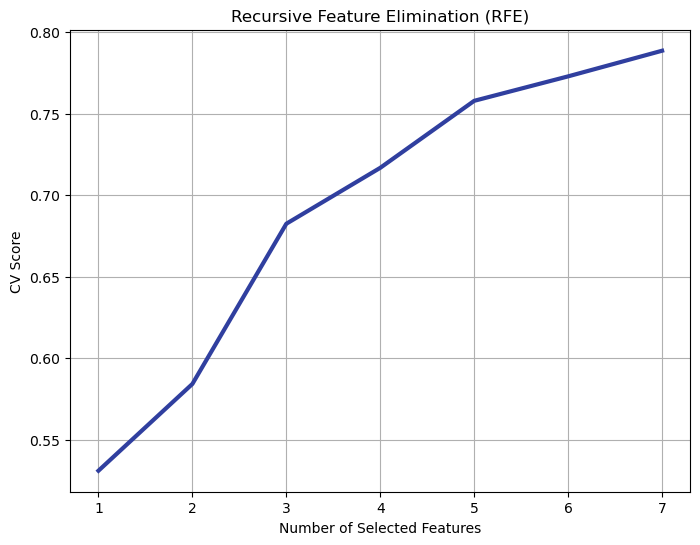

The optimal number of features: 7


In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))